In [4]:
from dotenv import load_dotenv
load_dotenv()   


False

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2
)


/home/badri/miniconda3/envs/hitomi/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
E0000 00:00:1758647339.836978   13377 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [6]:
messages = [
    ("system", "You are a helpful assistant"),
    ("user", "hello"),
]

ai_msg = llm.invoke(messages)

In [7]:
ai_msg

AIMessage(content='Hello! How can I help you today?', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': []}, id='run--9f021ced-12dc-46e5-aade-0d1f31cefdf6-0', usage_metadata={'input_tokens': 7, 'output_tokens': 32, 'total_tokens': 39, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 23}})

In [23]:
from langchain_core.tools import tool

@tool
def get_current_weather(location: str) -> str:
    """Get the current weather in a given location"""
    return f"The current weather in {location} is 72 degrees and sunny."

llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2

)

llm_with_tools = llm.bind_tools([get_current_weather])

query = "What's the weather like in Boston?"
ai_msg = llm_with_tools.invoke(query)

from langchain_core.messages import ToolMessage

tool_message = ToolMessage(
    content=get_current_weather(*ai_msg.tool_calls[0]["args"]),
    tool_call_id=ai_msg.tool_calls[0]["id"],
)
llm_with_tools.invoke([ai_msg, tool_message])

E0000 00:00:1758124168.309603   27968 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


AIMessage(content='OK. The current weather in Boston is 72 degrees and sunny.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--a962c6ca-2182-4180-8e4c-f03a4ddc5c92-0', usage_metadata={'input_tokens': 44, 'output_tokens': 16, 'total_tokens': 60, 'input_token_details': {'cache_read': 0}})

# testing langraph


In [3]:
%pip install -U langgraph

  Using cached langgraph-0.6.7-py3-none-any.whl.metadata (6.8 kB)
  Using cached langgraph_checkpoint-2.1.1-py3-none-any.whl.metadata (4.2 kB)
  Using cached langgraph_prebuilt-0.6.4-py3-none-any.whl.metadata (4.5 kB)
Using cached langgraph-0.6.7-py3-none-any.whl (153 kB)
Using cached langgraph_checkpoint-2.1.1-py3-none-any.whl (43 kB)
Using cached langgraph_prebuilt-0.6.4-py3-none-any.whl (28 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [langgraph]/6 [langgraph]checkpoint]
Note: you may need to restart the kernel to use updated packages.


In [10]:
from typing import Annotated, TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

class State(TypedDict):
    messages: Annotated[list, add_messages]

graph_builder= StateGraph(State)



In [11]:
import dotenv
from langchain.chat_models import init_chat_model
dotenv.load_dotenv()

llm = init_chat_model("google_genai:gemini-2.5-flash")


E0000 00:00:1758516202.921479   35709 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


In [12]:
def chatbot(state:State):
    return {"messages": [llm.stream(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

In [13]:
graph_builder.add_edge(START, "chatbot")

In [14]:
graph_builder.add_edge("chatbot", END)

In [15]:
graph = graph_builder.compile()


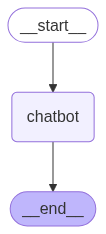

In [16]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [17]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content":user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)
while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print('sttop')
            break
        stream_graph_updates(user_input)
    except:
        user_input = "what do you know about about langgraph?"
        print("user: " + user_input)
        stream_graph_updates(user_input)
        break


user: what do you know about about langgraph?


NotImplementedError: Unsupported message type: <class 'generator'>
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/MESSAGE_COERCION_FAILURE 

In [ ]:
stream_graph_updates()